# Unsupervised Learning
AllLife Bank Credit Card Customer Segmentation

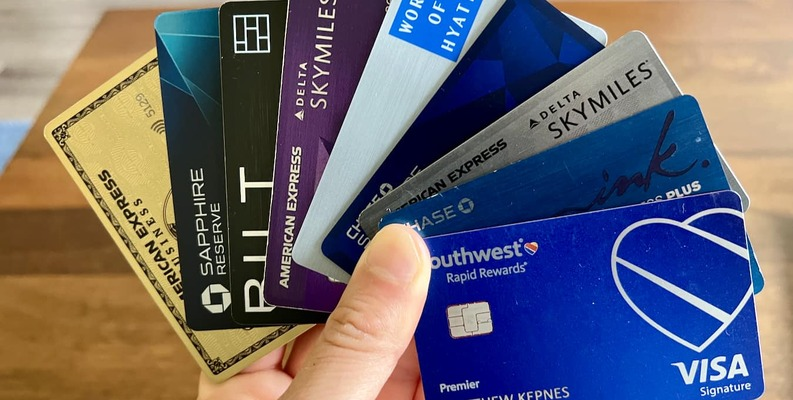

# **Problem Statement**

## Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. The Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help



## Objective

To identify different segments in the existing customers, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

## Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online, and through a call center).

Data Dictionary

Sl_No: Primary key of the records

Customer Key: Customer identification number

Average Credit Limit: Average credit limit of each customer for all credit cards

Total credit cards: Total number of credit cards possessed by the customer

Total visits bank: Total number of visits that the customer made (yearly) personally to the bank

Total visits online: Total number of visits or online logins made by the customer (yearly)

Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)


# **Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

# **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset
data = pd.read_excel("/content/drive/MyDrive/Credit Card Customer Data.xlsx")

# **Overview of the Dataset**

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

## Displaying first 5 and last 5 rows of the dataset

In [ ]:
# viewing the first 5 rows of the data
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


## Checking the shape of the dataset

In [ ]:
data.shape

(660, 7)

* The dataset has 660 rows and 7 columns

## Creating a copy of original data

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

## Checking the data types of the columns for the dataset

In [ ]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations**

- There is no columns with null entries.
- All columns are numeric value

## Checking the missing values

In [ ]:
# checking for missing values
df.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


- As seen previously, no columns have null values.

## Checking for duplicates values

In [ ]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

- There are no duplicate values in the data.

# **Data Preprocessing**

## Processing columns



- Let's drop unnesessary columns so that we can make a good model for clustering alorithem to segregate existing customer . i can remove Sl_No	 and Customer Key	 as its not relevent for segregation

In [ ]:
df = df.drop(["Sl_No", "Customer Key"], axis=1)

## Statistical summary of the dataset

In [ ]:
# let's look at the statistical summary of the data
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


**Observations**


- Avg_Credit_Limit: The average credit limit is approximately 34,574, with a wide range from 3,000 to 200,000, indicating significant variability in credit access among individuals.

- Total_Credit_Cards: On average, individuals hold about 4.7 credit cards, with some holding up to 10, reflecting diversity in credit card usage.

- Total_visits_bank and Total_visits_online: Bank visits average around 2.4, while online visits are slightly higher at 2.6, but with high variability, especially online visits, which can go up to 15 visits.

- Total_calls_made: The average number of calls made is roughly 3.6, with some individuals making as many as 10 calls, indicating differing levels of engagement or communication frequency.
Overall, these statistics highlight substantial variation in financial behavior and credit access within the sample.

# **Exploratory Data Analysis**

## Functions for EDA

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
99# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Univariate analysis

`Avg_Credit_Limit`

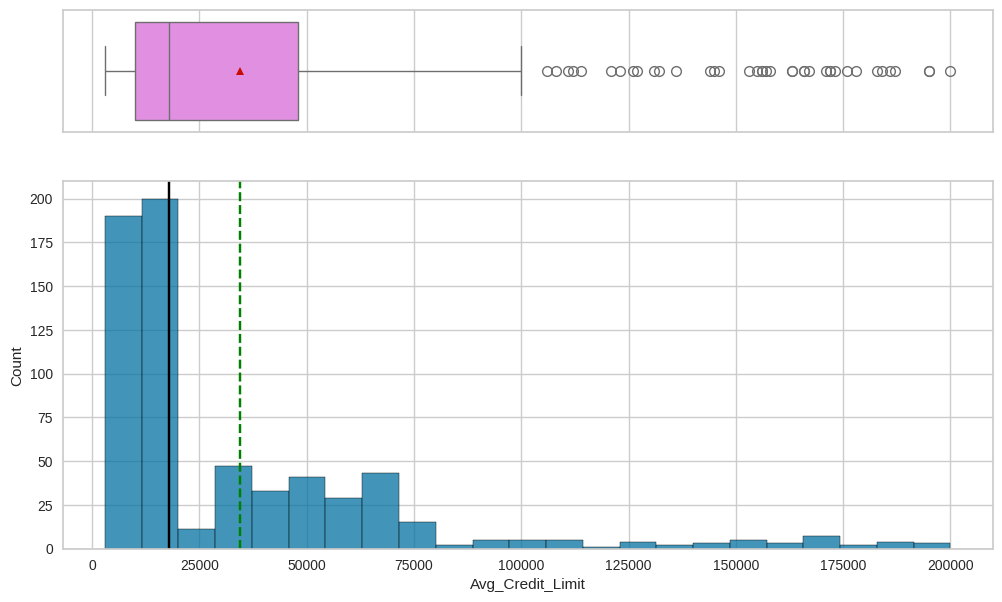

In [ ]:
histogram_boxplot(df, "Avg_Credit_Limit")

- Avg_Credit_Limit value looks slightly right skewd  distributed with a few high value outliers, and the mean is between 34574.242424 and median  is less then 25000

Total_Credit_Cards

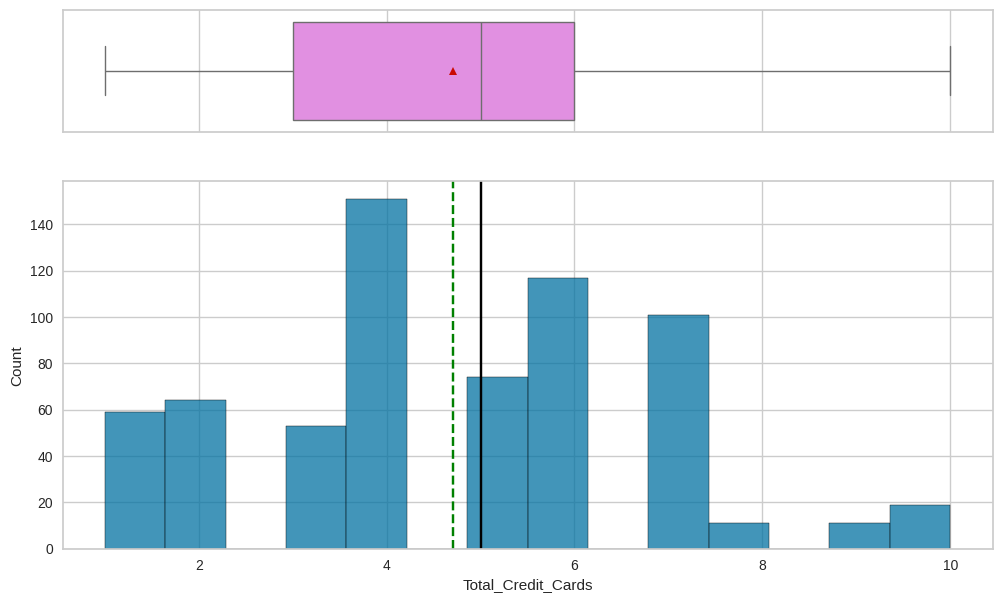

In [ ]:
histogram_boxplot(df, "Total_Credit_Cards")

- The box plot indicates that the average number of credit cardholders per individual is around 4 to 5, with the data ranging from 2 to 10 credit cards. The distribution appears to be approximately normal, centered around an average of 4 to 6 credit cards.

`Total_visits_bank`

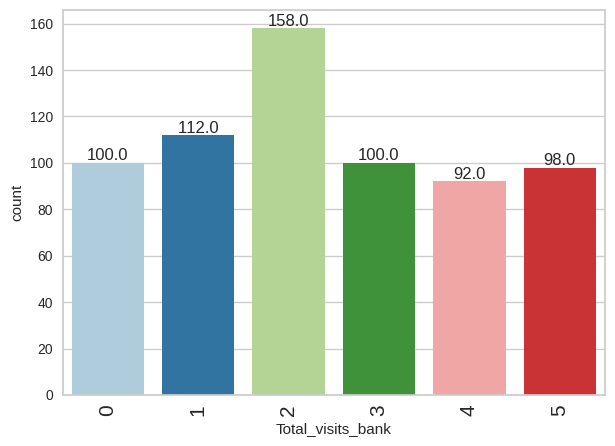

In [ ]:
labeled_barplot(df, "Total_visits_bank")

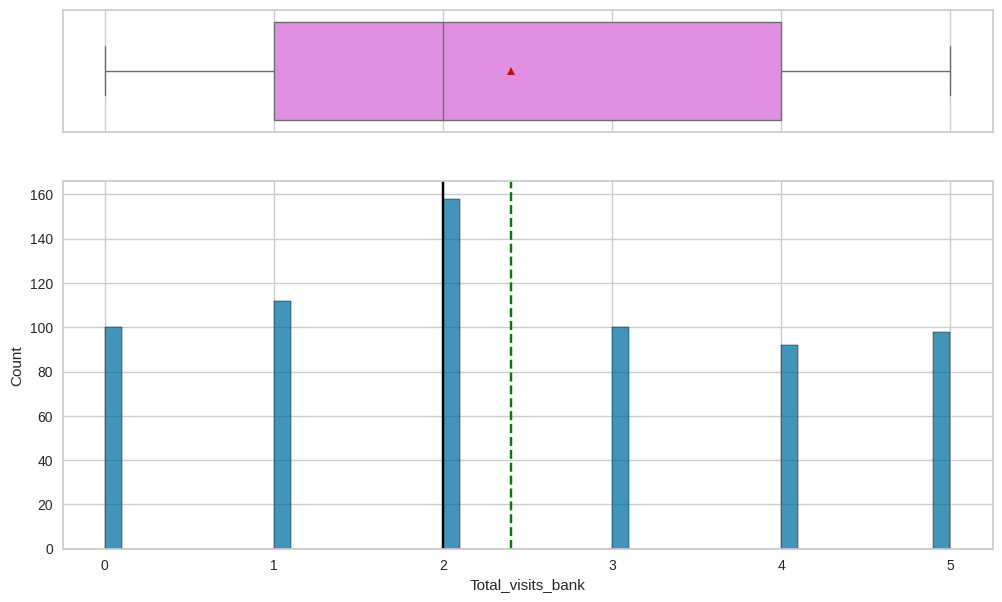

In [ ]:
histogram_boxplot(df, "Total_visits_bank", bins=50)

- Total visit of bank for any customers boxplot shows Population is almost nomally distributed with average between 2 and 3 (2.4)

`Total_visits_online`

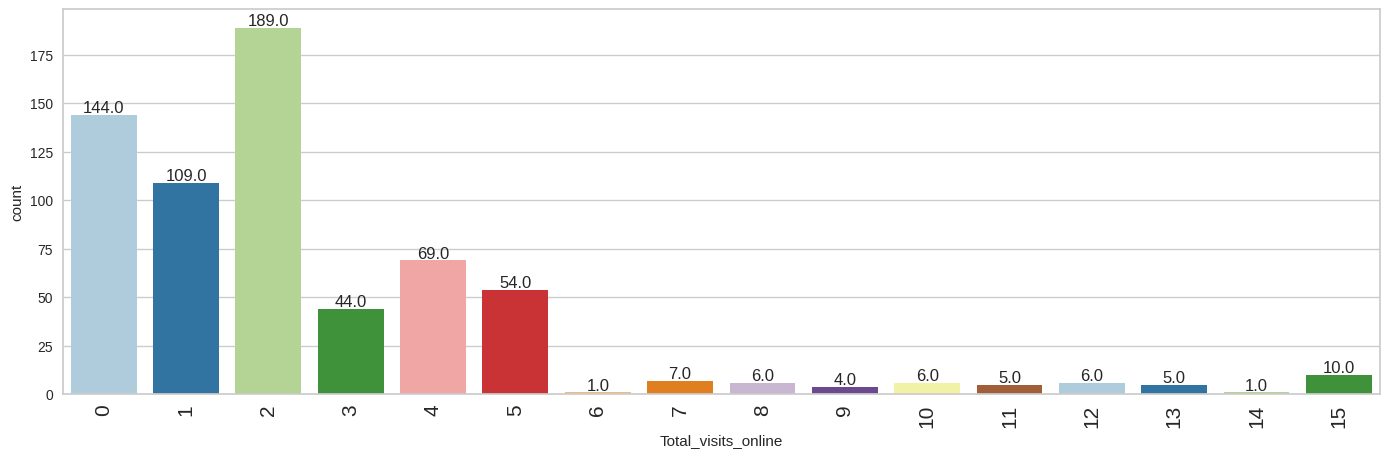

In [ ]:
labeled_barplot(df, "Total_visits_online")

- As per dataset provided 189 customers has made 2 online visites , 144 customers has not done any online visit and 109 customers has done 2 time visit ,very few customers make more then 5 online visits



Total_Credit_Cards

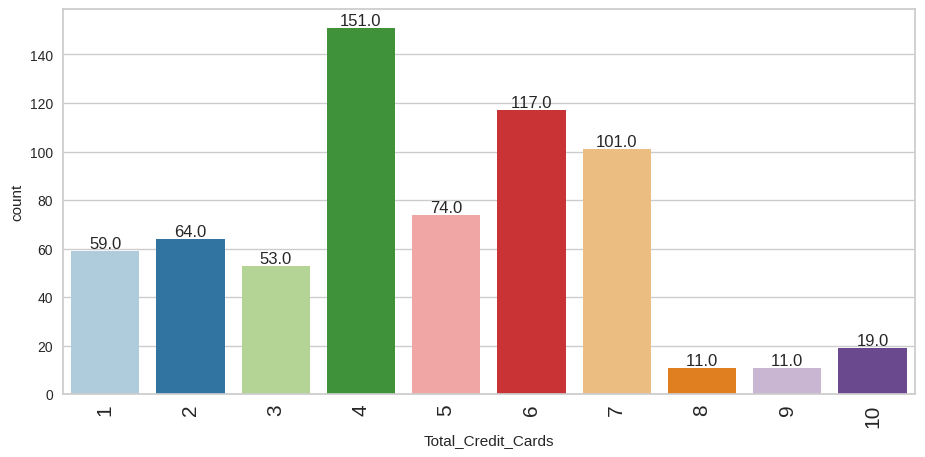

In [ ]:
labeled_barplot(df, "Total_Credit_Cards")

Total_calls_made

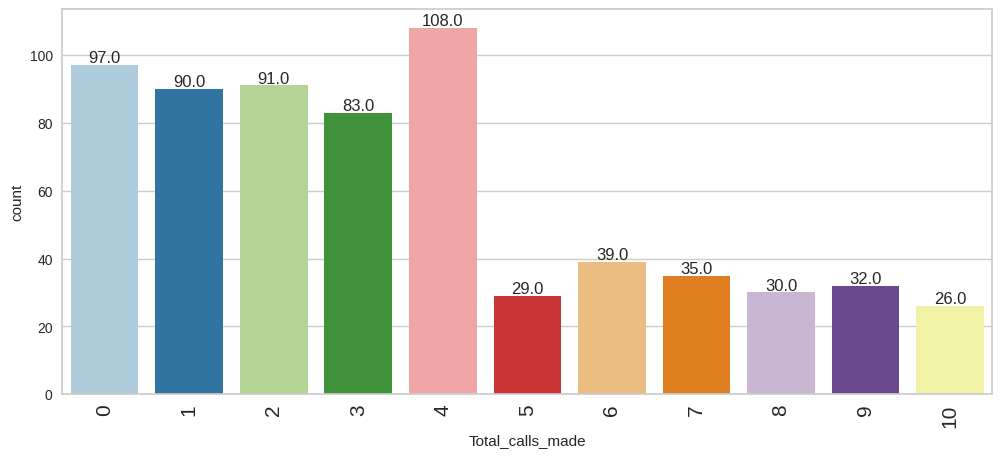

In [ ]:
labeled_barplot(df, "Total_calls_made")

observation -  large number of customers (108 ) has made 4 calls and maximum numbers of calls made by customers is 10

## Bivariate Analysis

**Let's check for correlations.**

In [ ]:
cols_list = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

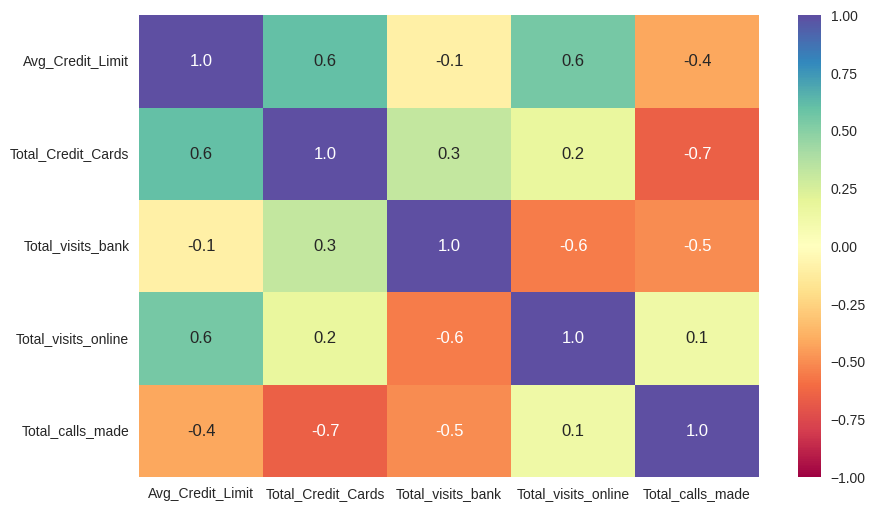

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="Spectral"
)
plt.show()

In [ ]:
cols_list = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

observation - 0.6 correlation between total credit cards of customers with average customer limit

0.6 correlation between total onlone visits of bank done by customer and average credit limit

0.7 correlation between total calls made and total credit cards with customers

there is negative correlation 0.6 between total visit online made by customer with total bank visit made

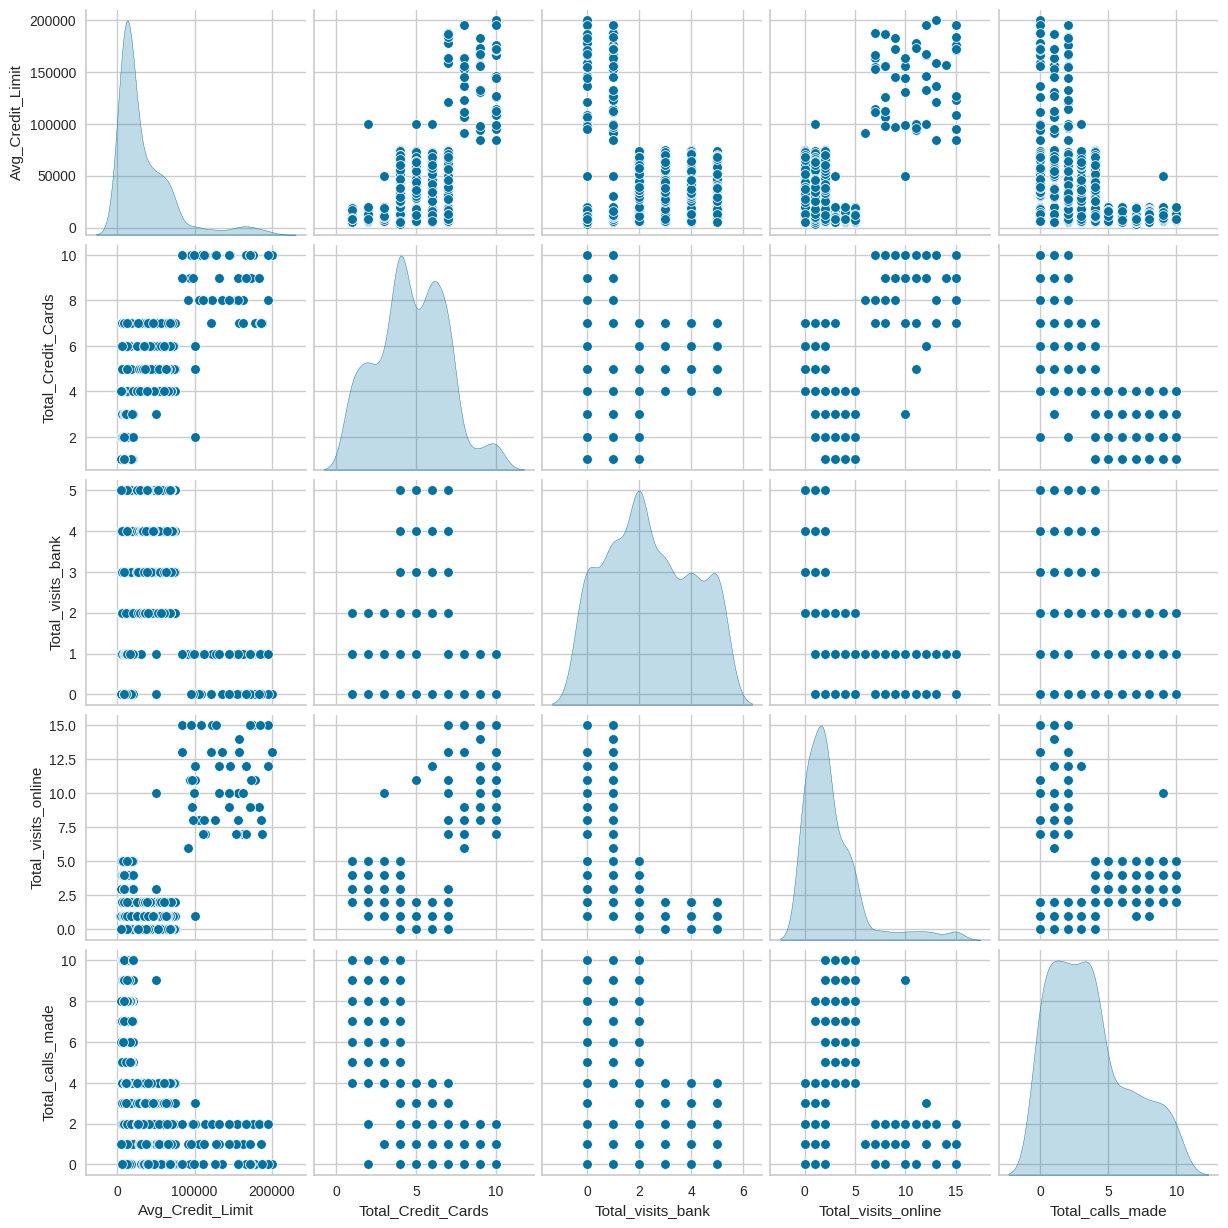

In [ ]:
sns.pairplot(data=df[cols_list], diag_kind="kde")
plt.show()

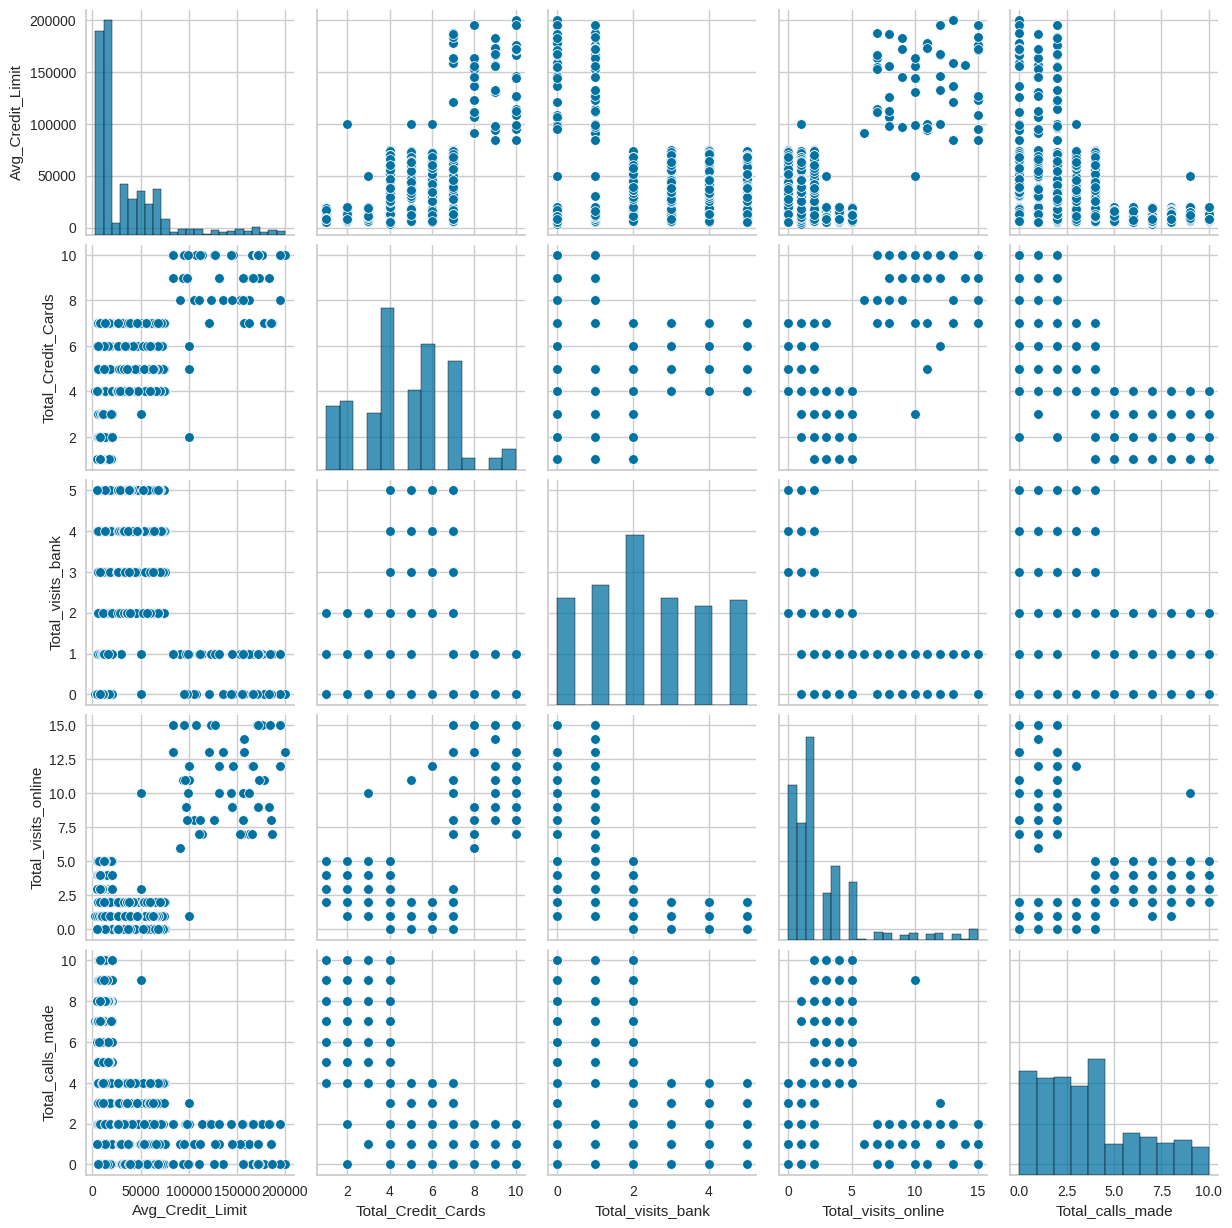

In [ ]:
# Pairplot or scatter plot matrix
numeric_cols = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
sns.pairplot(data[numeric_cols])
plt.show()

**Observations**


# **Data Preprocessing (Continued)**

## Missing Value Treatment

In [ ]:
df.isna().sum()

,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0



Outliers in Avg_Credit_Limit:
      Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
612            157000                   9                  1   
614            163000                   8                  1   
615            131000                   9                  1   
617            136000                   8                  0   
618            121000                   7                  0   
619            158000                   7                  0   
620            108000                  10                  0   
621            166000                   9                  1   
622            176000                  10                  1   
623            166000                  10                  0   
624            178000                   7                  0   
626            156000                   9                  1   
627            146000                  10                  0   
629            155000                   8                  0   
630     

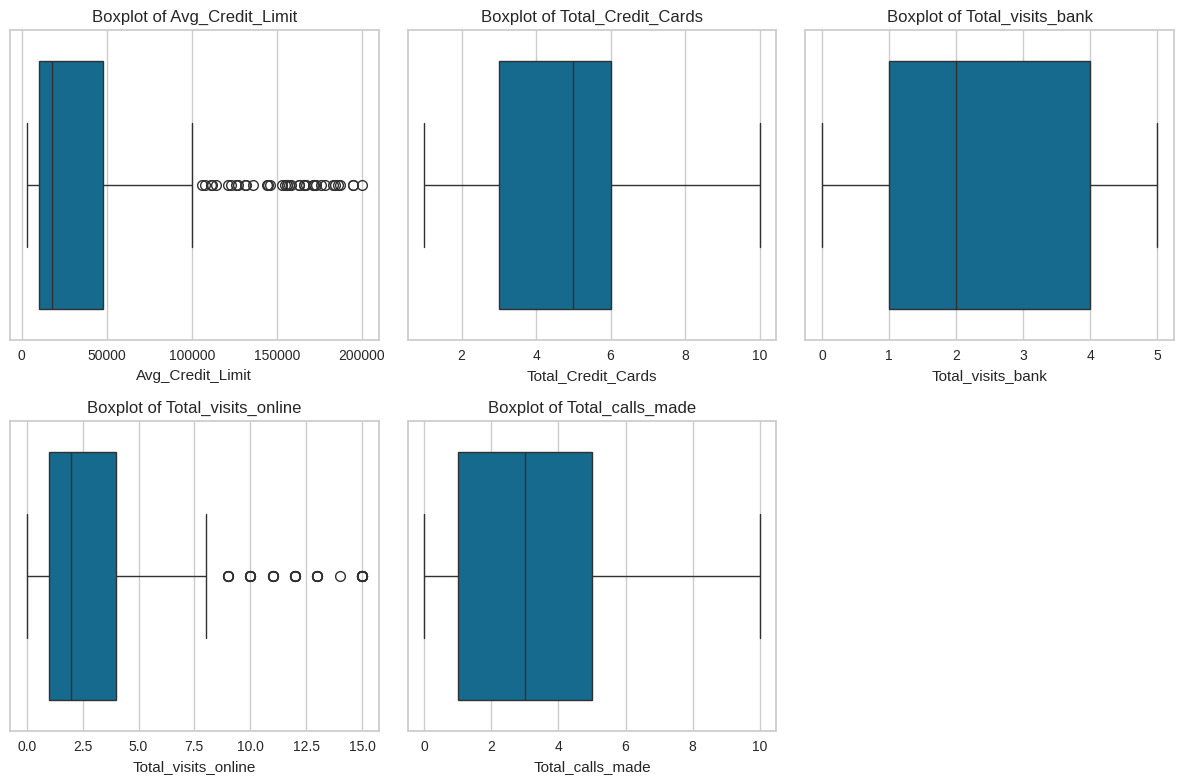

In [ ]:

# Select numerical columns for outlier detection
numerical_cols = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

# Function to detect outliers using IQR
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Detect outliers for each column
outliers_dict = {}
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    outliers_dict[col] = outliers

# Print outliers for each feature
for col, outliers in outliers_dict.items():
    print(f"\nOutliers in {col}:\n", outliers)

# Visualize outliers with boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Scaling

- Let's scale the data before we proceed with clustering.

In [ ]:
# Normalize features for clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
# Create a DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_data)
df_scaled.head()


,0,1,2,3,4
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [ ]:
# creating dataframe copies for k-means and hierarchical clustering
km_df = df.copy()
hc_df = df.copy()

# **Model Building**

## K-means Clustering

### Checking Elbow Plot

Number of Clusters: 2 	Average Distortion: 1.7178787250175898
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0902973540817666
Number of Clusters: 5 	Average Distortion: 0.9906853650098948
Number of Clusters: 6 	Average Distortion: 0.9515009282361341
Number of Clusters: 7 	Average Distortion: 0.9094119827472316
Number of Clusters: 8 	Average Distortion: 0.9191292344244387
Number of Clusters: 9 	Average Distortion: 0.8990131857179275
Number of Clusters: 10 	Average Distortion: 0.8723089051392604


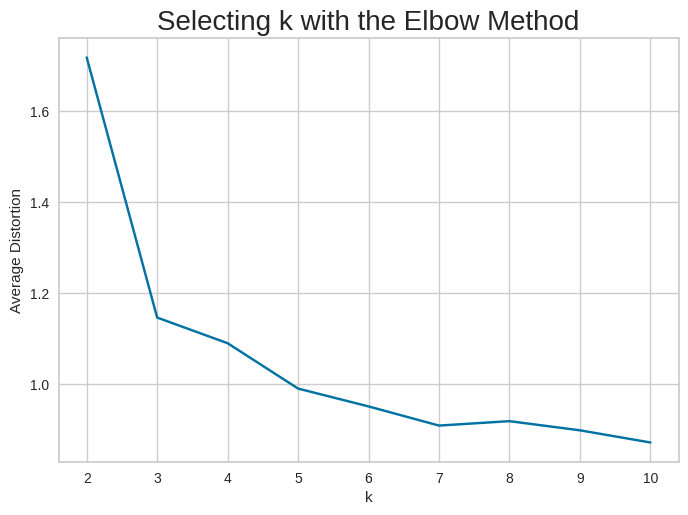

In [ ]:
clusters = range(2, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(df_scaled)
    prediction = model.predict(df_scaled)
    distortion = (
        sum(np.min(cdist(df_scaled, model.cluster_centers_, "euclidean"), axis=1))
        / df_scaled.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**Let's do further analysis to determine the optimal value of k**

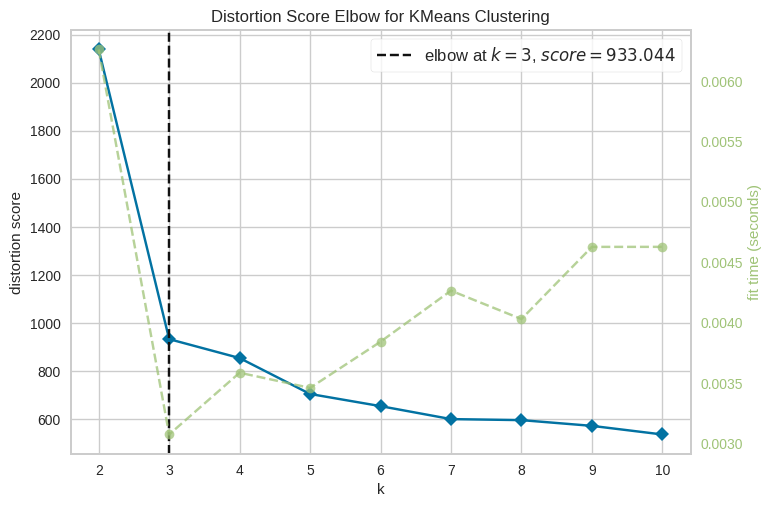

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), timings=True)
visualizer.fit(df_scaled)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Checking Silhouette Scores

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.5703183487340514)
For n_clusters = 3, the silhouette score is 0.5157182558881063)
For n_clusters = 4, the silhouette score is 0.3744071798973986)
For n_clusters = 5, the silhouette score is 0.27167502160723267)
For n_clusters = 6, the silhouette score is 0.24804756291576194)
For n_clusters = 7, the silhouette score is 0.24791254258020035)
For n_clusters = 8, the silhouette score is 0.22570382558070443)
For n_clusters = 9, the silhouette score is 0.19931783829027247)
For n_clusters = 10, the silhouette score is 0.20939001908412339)


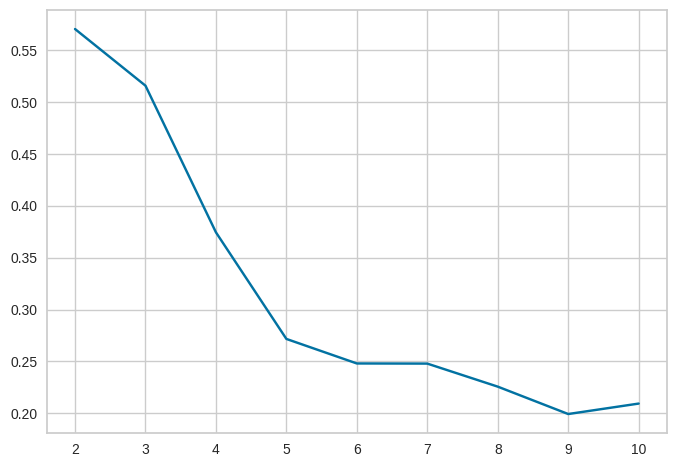

In [ ]:
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((df_scaled))
    score = silhouette_score(df_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

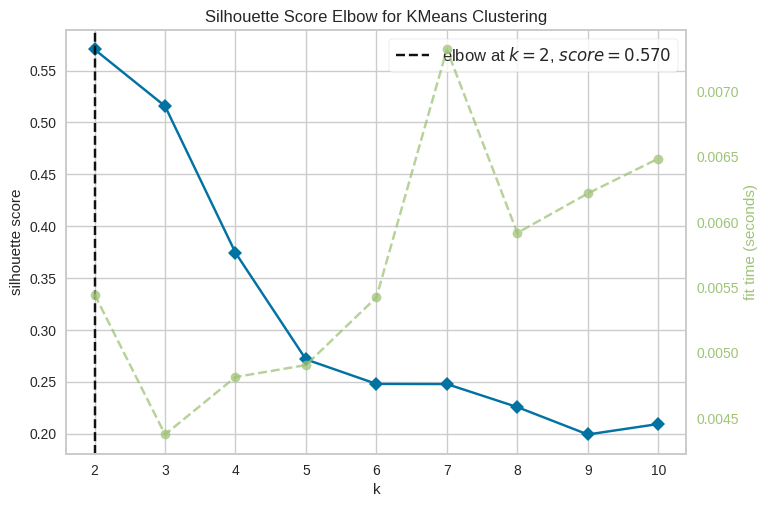

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=True)
visualizer.fit(df_scaled)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**From the silhouette scores, it seems that 4 is a good value for k.**

**Silhouette Plot**

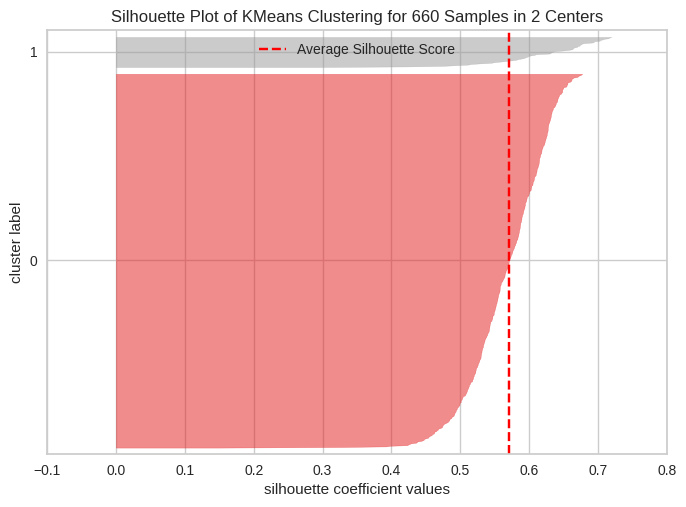

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

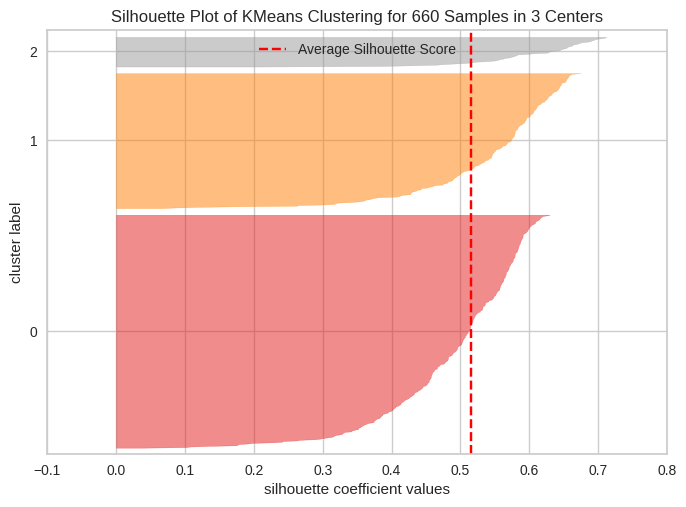

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

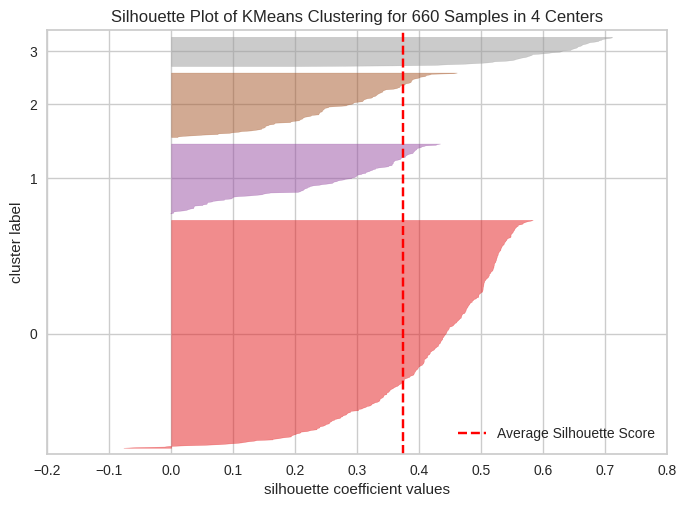

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

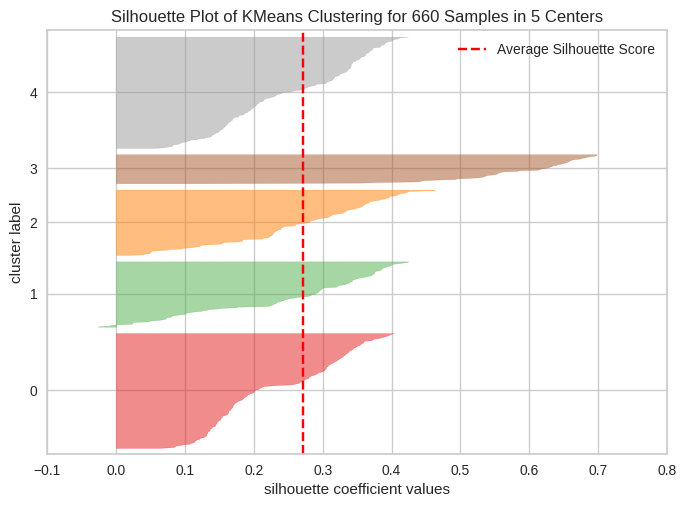

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

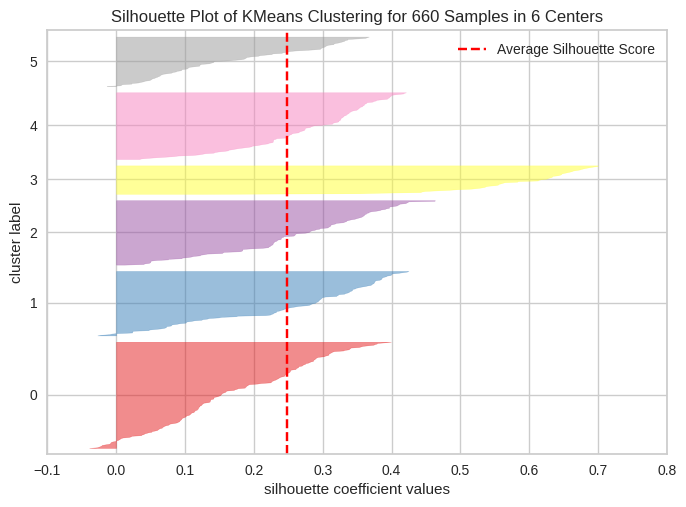

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

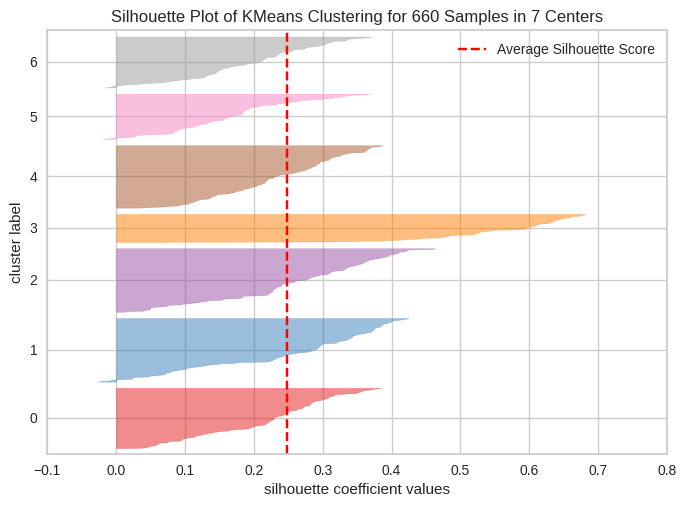

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

**We will proceed with k=6**

### Creating Final Model

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(df_scaled)

KMeans(n_clusters=6, random_state=1)

In [ ]:
# adding kmeans cluster labels to the original dataframe
km_df["KM_segments"] = kmeans.labels_

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


### Checking Dendrograms

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**


**Let's view the dendrograms for the different linkage methods.**

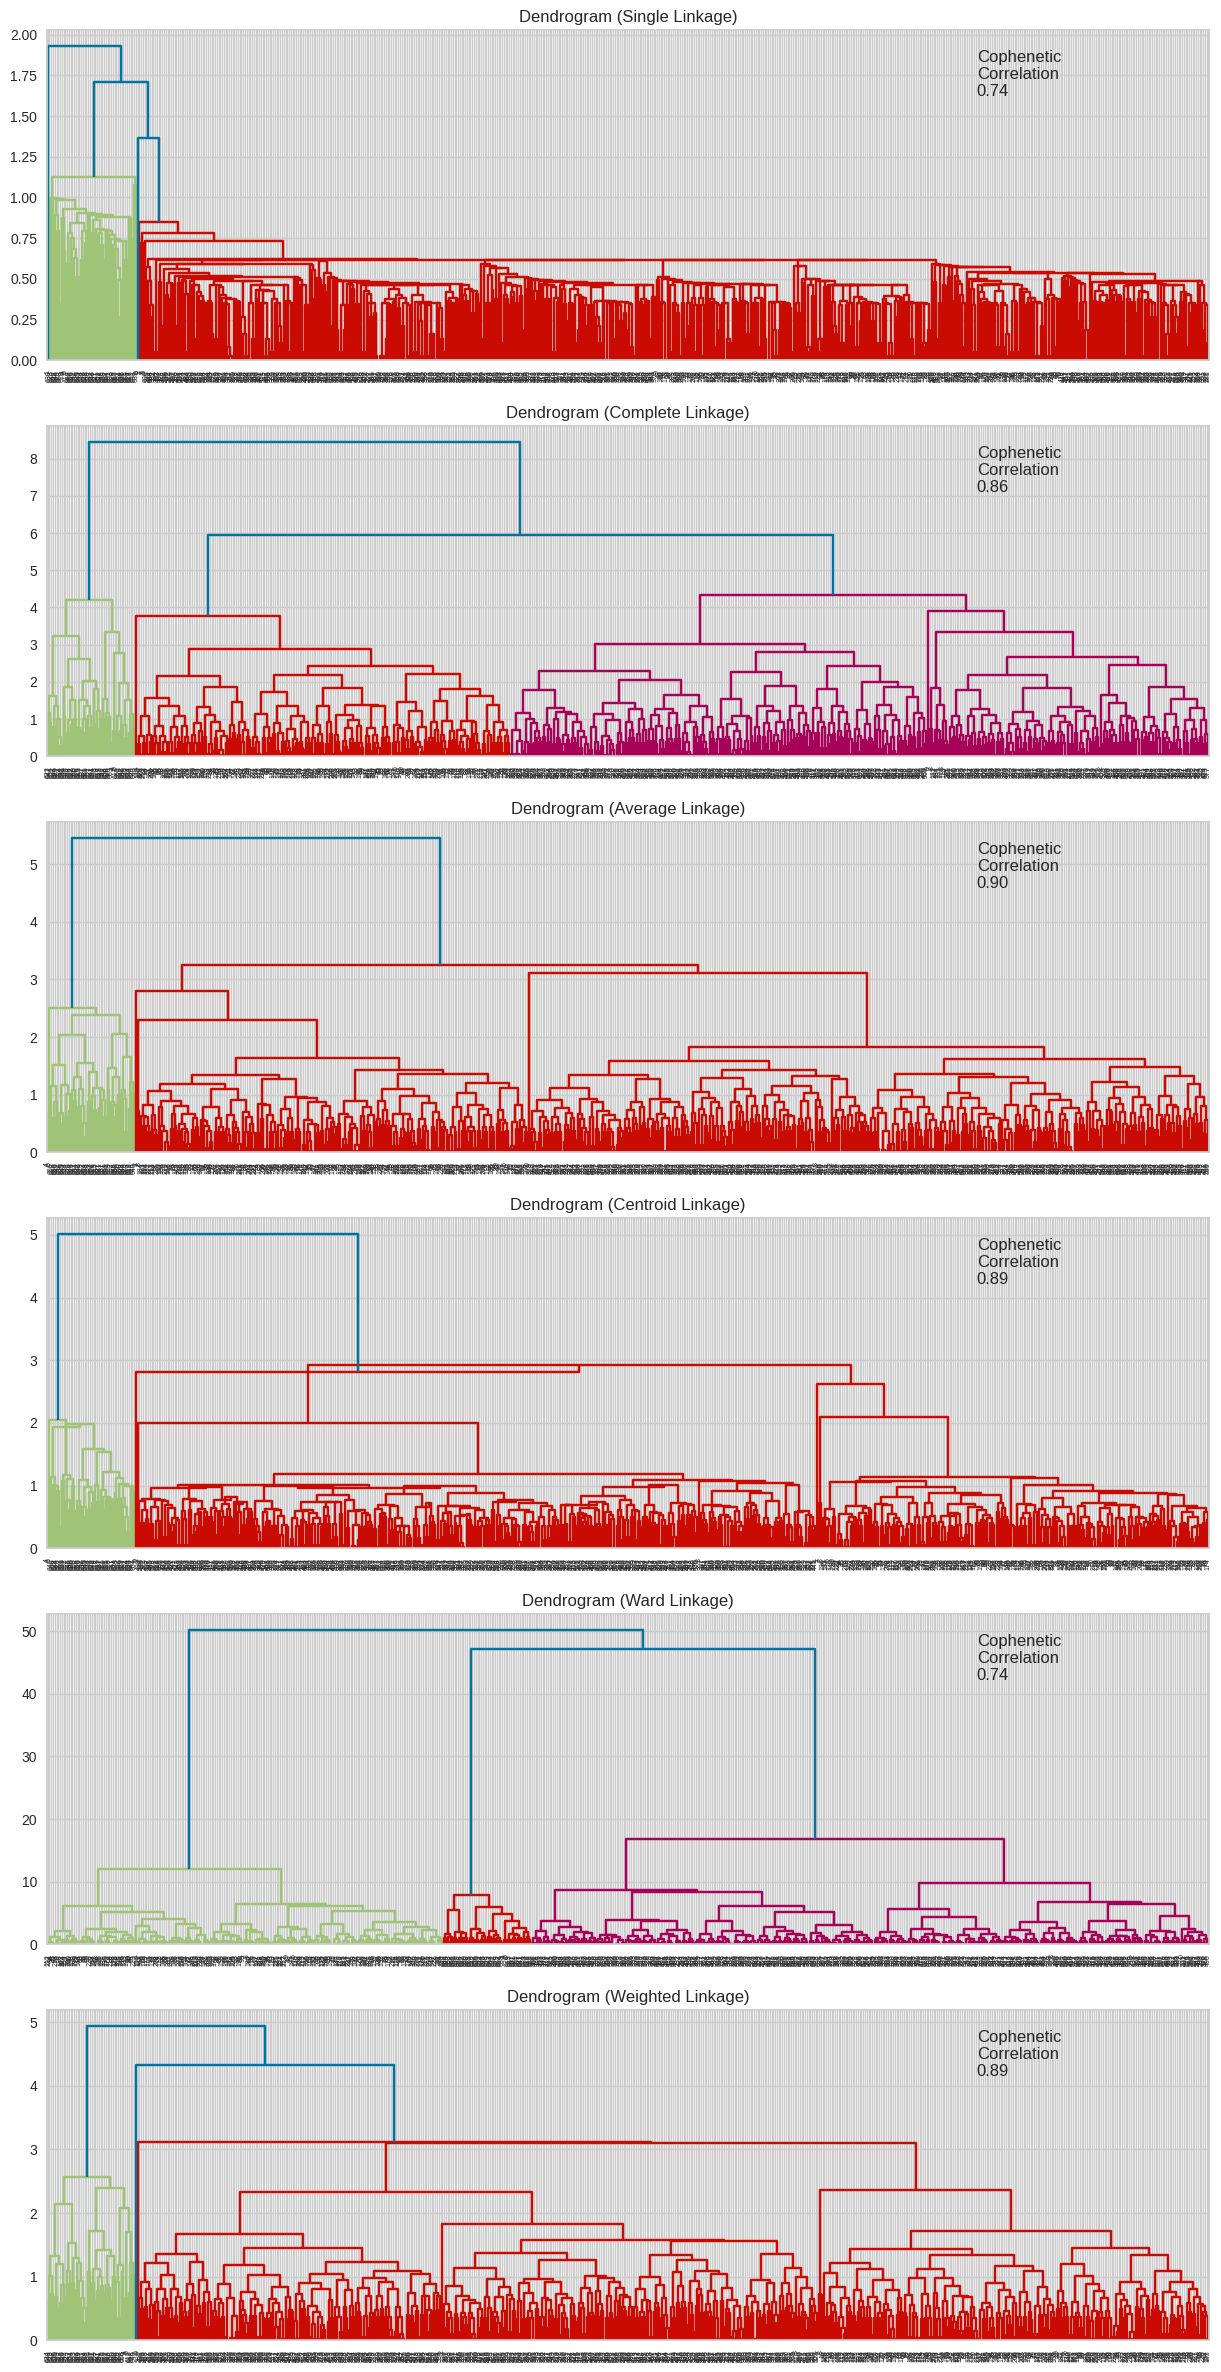

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- Looking the the above dendrograms, the Ward linkage seems to result in the best separation between clusters, even though its cophenetic correlation is lower than the other linkages.
- 6 looks to be a good choice for no. of clusters.

### Creating Final Model

In [ ]:
hc = AgglomerativeClustering(n_clusters=6, metric="euclidean", linkage="ward")
hc_labels = hc.fit_predict(df_scaled)

In [ ]:
hc_df["HC_segments"] = hc_labels

# **Cluster Profiling and Comparison**

## Cluster Profiling: K-means Clustering

In [ ]:
#Compute mean of features within each cluster
cluster_profile = km_df.groupby('KM_segments').mean().reset_index()

print("Cluster Profiling Summary:")
print(cluster_profile)

Cluster Profiling Summary:
   KM_segments  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            0      34418.478261            5.483696           2.461957   
1            1      12401.785714            2.214286           0.910714   
2            2      11946.428571            2.607143           0.955357   
3            3     141040.000000            8.740000           0.600000   
4            4      16448.275862            5.250000           4.543103   
5            5      55802.325581            5.941860           4.267442   

   Total_visits_online  Total_calls_made  
0             0.956522          2.043478  
1             3.669643          8.535714  
2             3.437500          5.205357  
3            10.900000          1.080000  
4             1.103448          1.931034  
5             0.872093          2.000000  


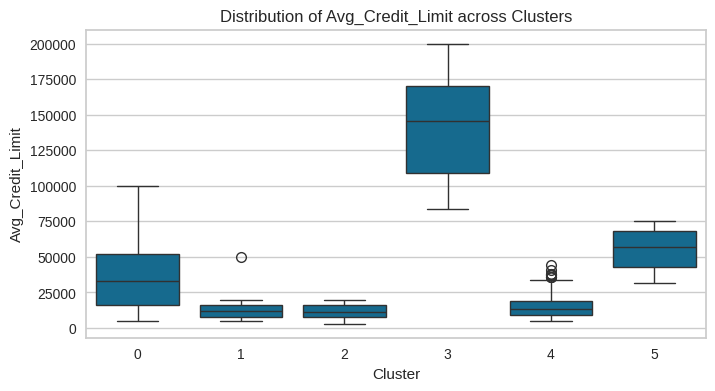

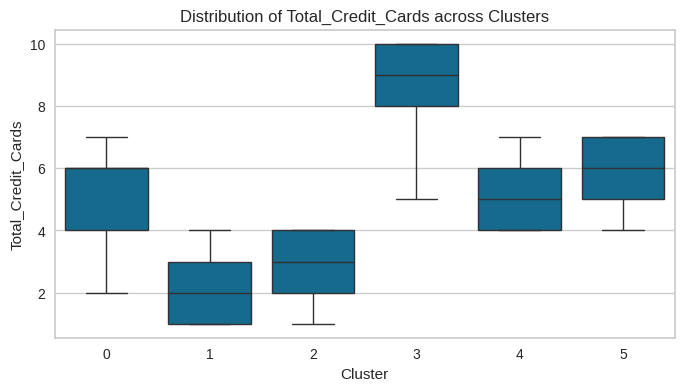

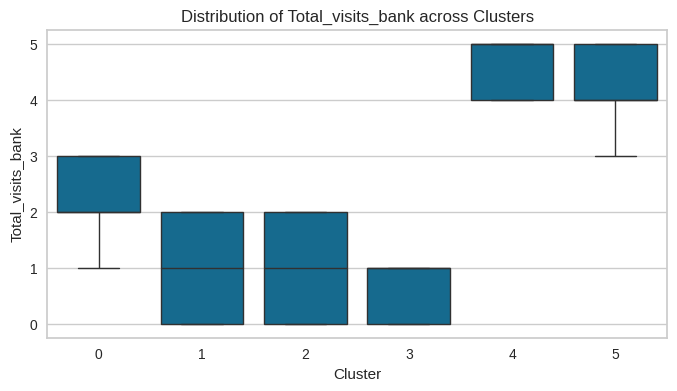

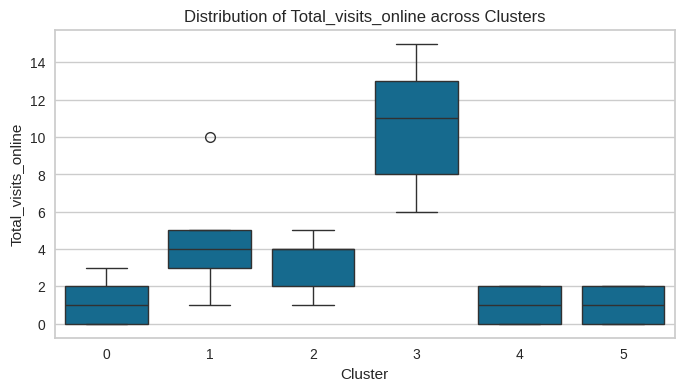

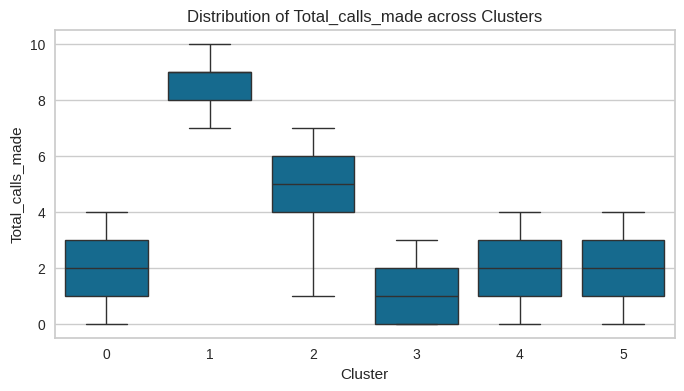

In [ ]:
# 2. Visualization: Boxplots for each feature across clusters
features = [
    'Avg_Credit_Limit',
    'Total_Credit_Cards',
    'Total_visits_bank',
    'Total_visits_online',
    'Total_calls_made'
]

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='KM_segments', y=feature, data=km_df)
    plt.title(f'Distribution of {feature} across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()


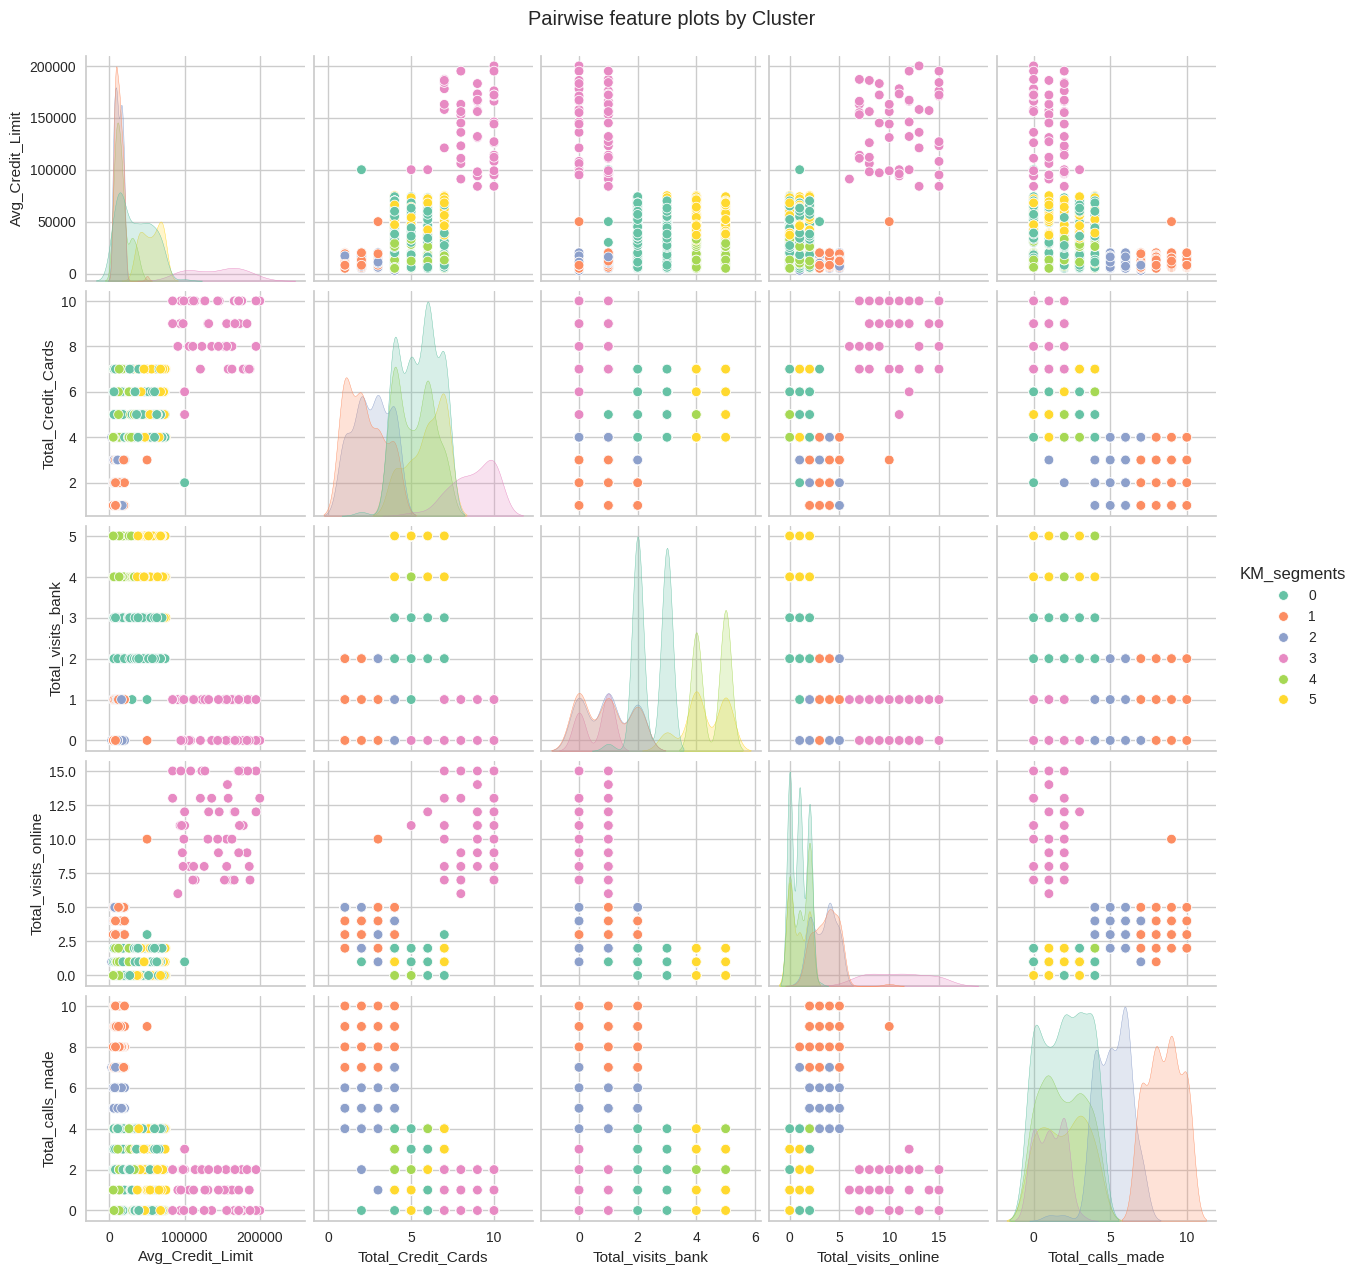

In [ ]:
 #Pairplot to visualize relationships between features
sns.pairplot(km_df, vars=features, hue='KM_segments', palette='Set2')
plt.suptitle('Pairwise feature plots by Cluster', y=1.02)
plt.show()

### Insights

Cluster 0
Profile:

Avg Credit Limit: ~34,418
Total Credit Cards: ~5.48
Visits to Bank: ~2.46
Online Visits: ~0.96
Calls Made: ~2.04


Interpretation:

Moderate credit limit and credit card ownership.
Occasional bank visits and some online activity.
Moderate engagement via calls.


Business Recommendations:

Cross-sell additional banking products like loans or savings accounts.
Promote digital banking features to boost online visits.
Loyalty programs to deepen engagement and retention.


Cluster 1
Profile:

Avg Credit Limit: ~12,402
Total Credit Cards: ~2.21
Visits to Bank: ~0.91
Online Visits: ~3.67
Calls Made: ~8.54


Interpretation:

Lower credit limit and fewer credit cards.
Minimal physical visits but high online activity.
Very high call interactions, suggesting active customer service or support needs.


Business Recommendations:

Focus on improving digital onboarding and self-service options.
Use targeted campaigns to upsell credit cards or financial products.
Leverage call data to identify customer needs and personalize offers.


Cluster 2
Profile:

Avg Credit Limit: ~11,946
Total Credit Cards: ~2.61
Visits to Bank: ~0.96
Online Visits: ~3.44
Calls Made: ~5.21


Interpretation:

Similar profile to Cluster 1 but slightly higher credit limit and credit card count.
Moderate online activity, fewer calls than Cluster 1.


Business Recommendations:

Promote digital banking and online services.
Offer targeted credit card upgrades.
Use digital channels for customer engagement.


Cluster 3
Profile:

Avg Credit Limit: ~141,040 (significantly higher)
Total Credit Cards: 8.74
Visits to Bank: 0.6 (low)
Online Visits: 10.9 (very high)
Calls Made: ~1.08 (low)


Interpretation:

High credit limit and credit card ownership.
Minimal physical visits but very active online.
Likely high-net-worth or digitally engaged clients.


Business Recommendations:

Offer premium digital wealth management and investment products.
Personalized online dashboards or exclusive online services.
Consider targeted invites to premium banking services.


Cluster 4
Profile:

Avg Credit Limit: ~16,448
Total Credit Cards: ~5.25
Visits to Bank: ~4.54
Online Visits: ~1.10
Calls Made: ~1.93


Interpretation:

Moderate credit profile.
Higher physical visit frequency.
Lower online engagement.


Business Recommendations:

Encourage digital engagement through targeted marketing.
Offer in-branch financial advisory services.
Develop loyalty programs to increase online activity.


Cluster 5
Profile:

Avg Credit Limit: ~55,802
Total Credit Cards: ~5.94
Visits to Bank: ~4.27
Online Visits: ~0.87
Calls Made: ~2.00


Interpretation:

Higher credit limit and credit card ownership.
Regular bank visits but limited online activity.
Moderate call interactions.


Business Recommendations:

Promote digital banking to reduce branch visits and improve convenience.
Upsell premium credit products.
Use in-branch services for personalized financial planning.



Overall Business Insights & Strategies:
High-value clients (Clusters 3 & 5): Focus on premium digital and wealth management services, personalized offers.
Digital-savvy clients (Clusters 1 & 2): Promote online banking features, digital credit card upgrades.
Branch-preferers (Clusters 4 & 5): Enhance in-branch service quality, loyalty programs, and digital onboarding.


## Cluster Profiling: Hierarchical Clustering

In [ ]:
# 1. Cluster Profiling: Calculate mean of features within each hierarchical cluster
hc_cluster_profile = hc_df.groupby('HC_segments').mean().reset_index()

print("Hierarchical Cluster Profiling Summary:")
print(hc_cluster_profile)


Hierarchical Cluster Profiling Summary:
   HC_segments  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            0      29474.226804            5.365979           4.448454   
1            1      52675.213675            5.495726           2.547009   
2            2     141040.000000            8.740000           0.600000   
3            3      11834.586466            2.631579           0.977444   
4            4      12608.695652            2.119565           0.880435   
5            5      15567.567568            5.945946           2.486486   

   Total_visits_online  Total_calls_made  
0             1.010309          1.891753  
1             0.982906          2.282051  
2            10.900000          1.080000  
3             3.338346          5.556391  
4             3.847826          8.739130  
5             0.891892          1.810811  


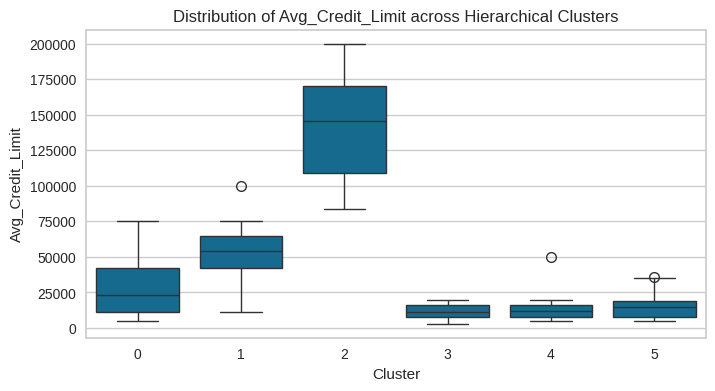

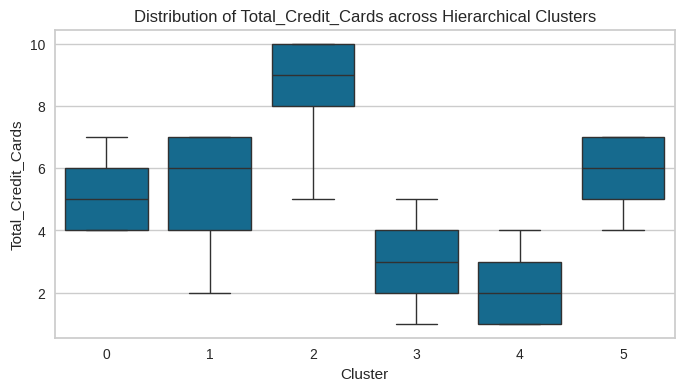

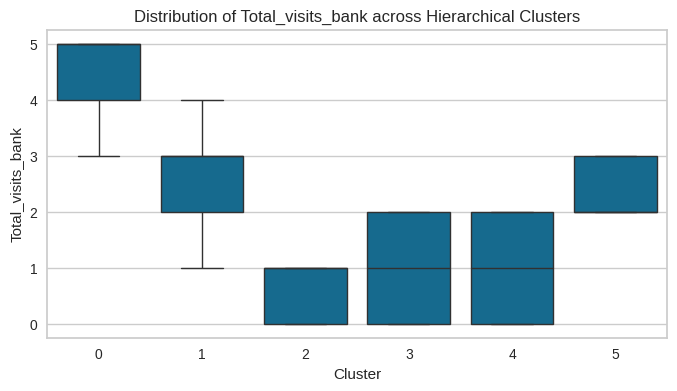

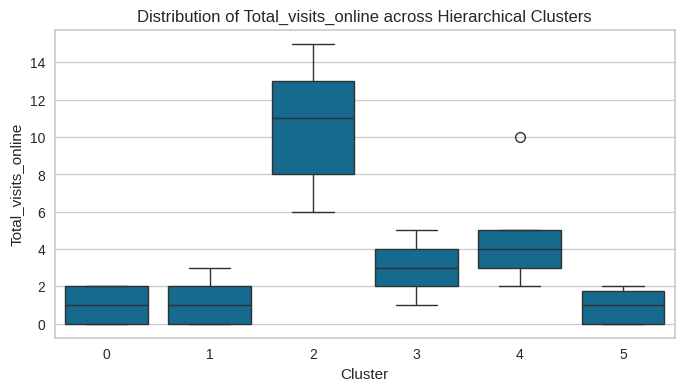

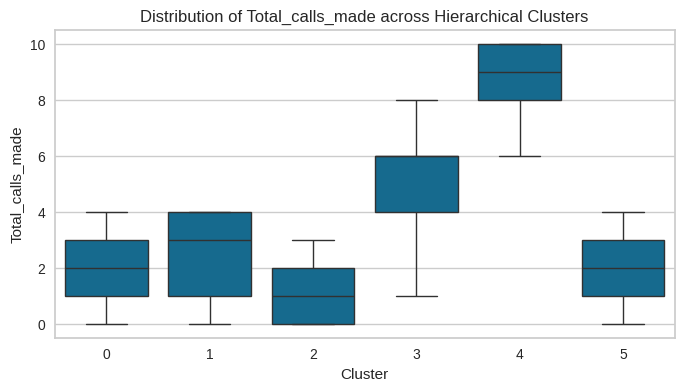

In [ ]:
# 2. Visualization: Boxplots for each feature by hierarchical cluster
features = [
    'Avg_Credit_Limit',
    'Total_Credit_Cards',
    'Total_visits_bank',
    'Total_visits_online',
    'Total_calls_made'
]

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='HC_segments', y=feature, data=hc_df)
    plt.title(f'Distribution of {feature} across Hierarchical Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()


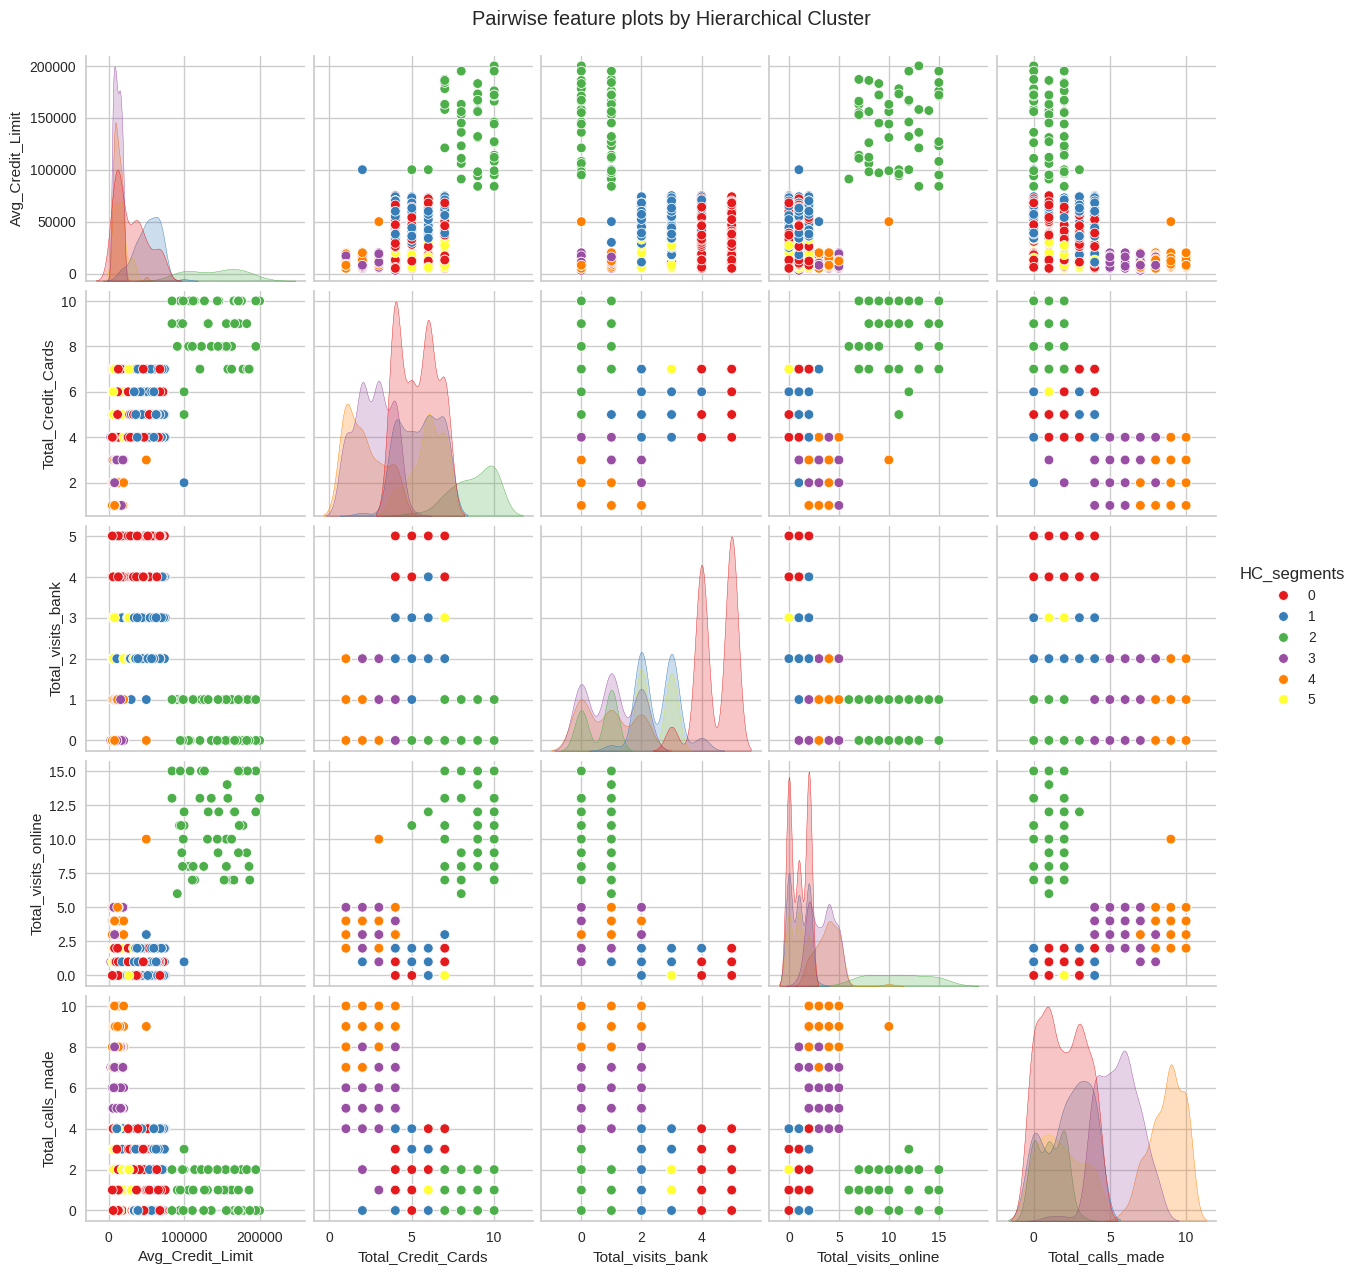

In [ ]:
# 3. Optional: Pairplot to visualize relationships between features across clusters
sns.pairplot(hc_df, vars=features, hue='HC_segments', palette='Set1')
plt.suptitle('Pairwise feature plots by Hierarchical Cluster', y=1.02)
plt.show()

##Observation

Insights

Cluster 0
Profile:

Average Credit Limit: ~29,474
Total Credit Cards: ~5.37
Total Visits to Bank: ~4.45
Total Visits Online: ~1.01
Total Calls Made: ~1.89


Interpretation:

Moderate credit limit and credit card ownership.
Regular bank visits with some online activity.
Moderate engagement through calls.


Business Recommendations:

Focus on cross-selling banking products like savings accounts or loan offers.
Loyalty programs to increase online engagement.
Personalized communication to deepen the relationship.


Cluster 1
Profile:

Average Credit Limit: ~52,675
Total Credit Cards: ~5.50
Total Visits to Bank: ~2.55
Total Visits Online: ~0.98
Total Calls Made: ~2.28


Interpretation:

Higher credit limit than Cluster 0 but similar credit card count.
Fewer bank visits than Cluster 0, but online visits are steady.
Slightly more calls, indicating active communication.


Business Recommendations:

Target with premium credit offers or credit card upgrades.
Promote online banking features to increase digital engagement.
Use call center outreach for personalized financial advice.


Cluster 2
Profile:

Average Credit Limit: ~141,040 (significantly higher)
Total Credit Cards: 8.74
Total Visits to Bank: 0.6 (very low)
Total Visits Online: 10.9 (very high)
Total Calls Made: 1.08


Interpretation:

High credit limit and credit card ownership.
Minimal physical bank visits but very high online activity.
Likely digital-savvy, possibly high-net-worth clients or business customers.


Business Recommendations:

Offer premium digital services like wealth management, investment products.
Personalized online dashboards or mobile apps.
Consider exclusive online-only offers or services.


Cluster 3
Profile:

Credit Limit: ~11,835 (low)
Credit Cards: 2.63
Visits to Bank: ~0.98
Online Visits: ~3.34
Calls Made: ~5.56


Interpretation:

Lower credit limit and fewer credit cards.
Moderate online activity but high call interactions, possibly indicating need for assistance.


Business Recommendations:

Focus on educating about credit products and financial planning.
Enhance digital onboarding and self-service options.
Use calls to upsell or cross-sell basic banking products.


Cluster 4
Profile:

Credit Limit: ~12,609
Credit Cards: 2.12
Visits to Bank: ~0.88
Online Visits: ~3.85
Calls Made: ~8.74 (very high)


Interpretation:

Similar to Cluster 3 but with even more calls.
Possibly less engaged or higher maintenance clients.


Business Recommendations:

Use targeted outreach to understand their needs.
Offer financial advisory or personalized solutions.
Improve digital engagement to reduce reliance on calls.


Cluster 5
Profile:

Credit Limit: ~15,568
Credit Cards: ~5.95
Visits to Bank: ~2.49
Online Visits: ~0.89
Calls Made: ~1.81


Interpretation:

Moderate credit limit, similar to Clusters 0 and 1.
Slightly more bank visits and credit cards.
Lower online activity, indicating preference for physical banking.


Business Recommendations:

Promote digital banking to increase online engagement.
Loyalty programs to strengthen relationship.
Personalized offers for credit card upgrades or savings.



Overall Insights & Business Strategy:
High-Value Clients (Cluster 2): Focus on premium digital services, wealth management, and exclusive online offers.
Moderate Clients (Clusters 0, 1, 5): Cross-sell credit products and promote digital banking.
Lower Engagement Clusters (3, 4): Use proactive calls, educational campaigns, and digital onboarding

## K-means vs Hierarchical Clustering

In [ ]:
# Compute mean profiles for K-means clusters
cluster_profile_km = km_df.groupby('KM_segments').mean().reset_index()

# Compute mean profiles for Hierarchical clusters
cluster_profile_hc = hc_df.groupby('HC_segments').mean().reset_index()

# Rename columns for merging comparison
cluster_profile_km = cluster_profile_km.rename(columns={'KM_segments': 'Cluster', 'Avg_Credit_Limit': 'KM_Avg_Credit_Limit',
                                                          'Total_Credit_Cards': 'KM_Total_Credit_Cards',
                                                          'Total_visits_bank': 'KM_Total_visits_bank',
                                                          'Total_visits_online': 'KM_Total_visits_online',
                                                          'Total_calls_made': 'KM_Total_calls_made'})

cluster_profile_hc = cluster_profile_hc.rename(columns={'HC_segments': 'Cluster', 'Avg_Credit_Limit': 'HC_Avg_Credit_Limit',
                                                          'Total_Credit_Cards': 'HC_Total_Credit_Cards',
                                                          'Total_visits_bank': 'HC_Total_visits_bank',
                                                          'Total_visits_online': 'HC_Total_visits_online',
                                                          'Total_calls_made': 'HC_Total_calls_made'})

# Merge profiles on cluster index (assuming same number of clusters)
comparison_df = pd.merge(cluster_profile_km, cluster_profile_hc, on='Cluster', how='inner')

# Calculate correlation between feature vectors
features = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
correlations = {}
for feature in features:
    corr = np.corrcoef(comparison_df[f'KM_{feature}'], comparison_df[f'HC_{feature}'])[0,1]
    correlations[feature] = corr

print("Correlation between K-means and Hierarchical cluster profiles:")
for feature, corr_value in correlations.items():
    print(f"{feature}: {corr_value:.2f}")


Correlation between K-means and Hierarchical cluster profiles:
Avg_Credit_Limit: -0.47
Total_Credit_Cards: -0.65
Total_visits_bank: 0.13
Total_visits_online: 0.14
Total_calls_made: -0.44


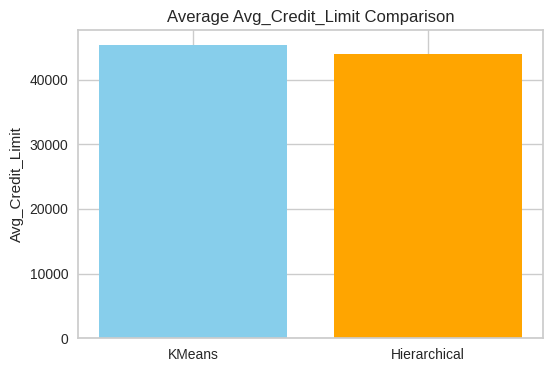

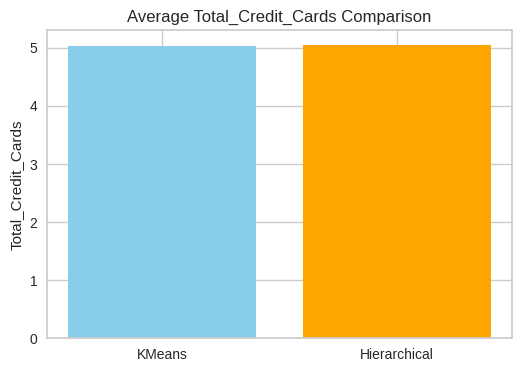

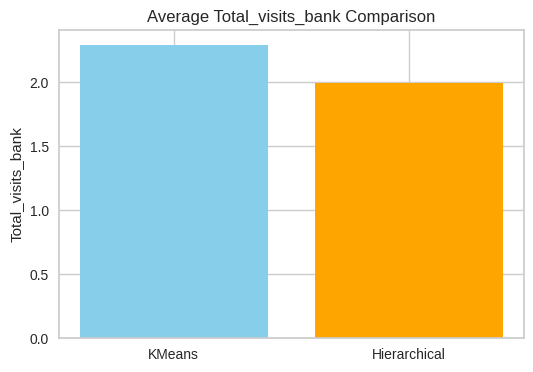

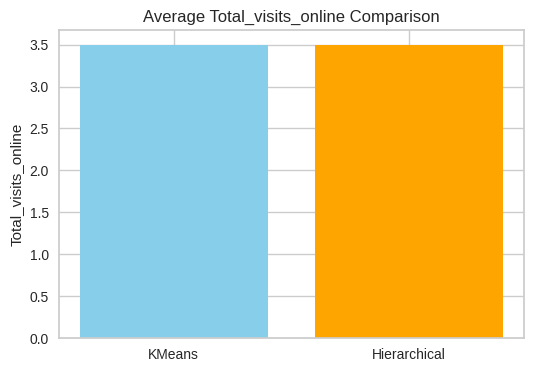

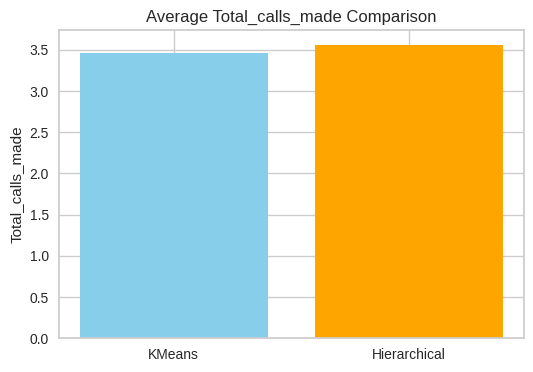

In [ ]:
# Optional: Visualize the comparison
for feature in features:
    plt.figure(figsize=(6,4))
    plt.bar(['KMeans', 'Hierarchical'],
            [comparison_df[f'KM_{feature}'].mean(), comparison_df[f'HC_{feature}'].mean()], color=['skyblue', 'orange'])
    plt.title(f'Average {feature} Comparison')
    plt.ylabel(feature)
    plt.show()

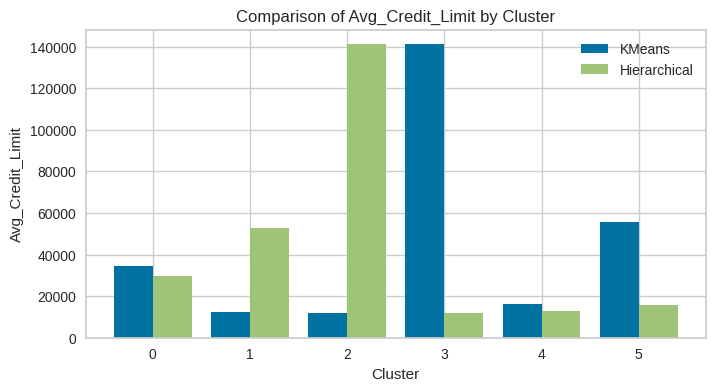

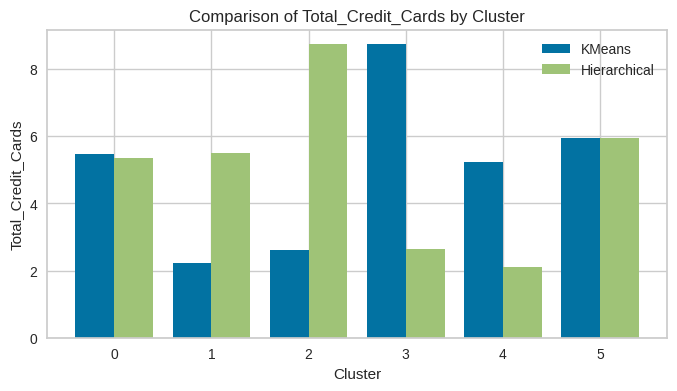

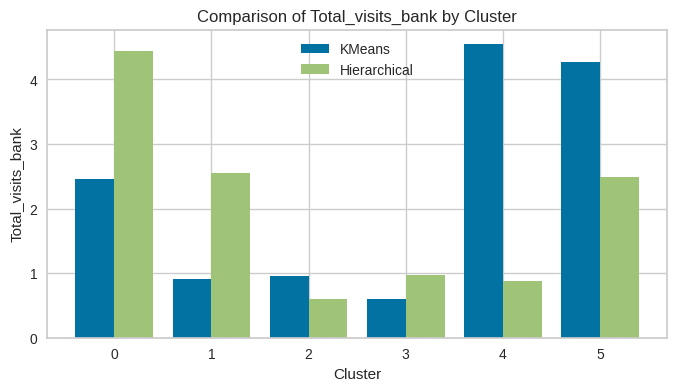

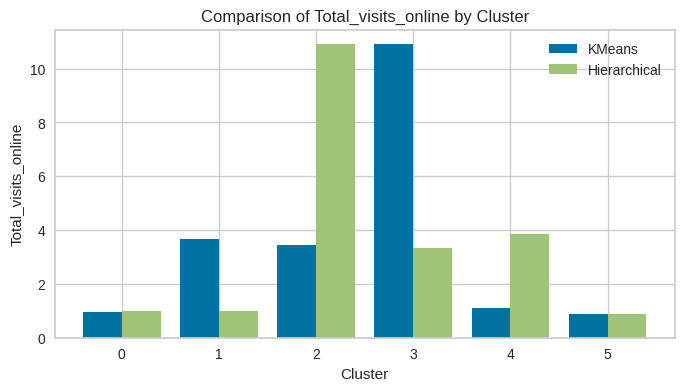

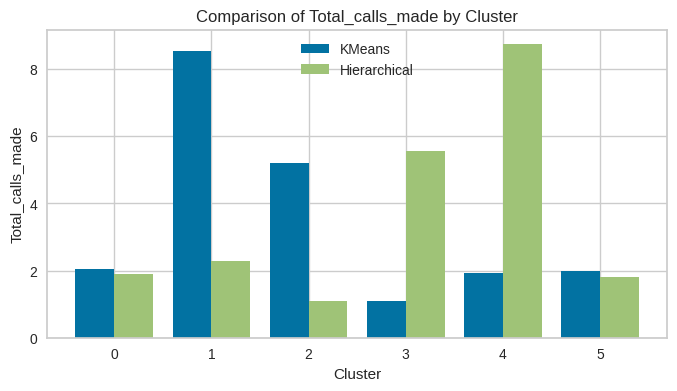

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming km_df and hc_df are your DataFrames with clustering results

# 1. Compute mean profiles for KMeans clusters
cluster_profile_km = km_df.groupby('KM_segments').mean().reset_index()

# 2. Compute mean profiles for Hierarchical clusters
cluster_profile_hc = hc_df.groupby('HC_segments').mean().reset_index()

# 3. Rename columns for clarity
cluster_profile_km = cluster_profile_km.rename(
    columns={
        'KM_segments': 'Cluster',
        'Avg_Credit_Limit': 'KM_Avg_Credit_Limit',
        'Total_Credit_Cards': 'KM_Total_Credit_Cards',
        'Total_visits_bank': 'KM_Total_visits_bank',
        'Total_visits_online': 'KM_Total_visits_online',
        'Total_calls_made': 'KM_Total_calls_made'
    }
)

cluster_profile_hc = cluster_profile_hc.rename(
    columns={
        'HC_segments': 'Cluster',
        'Avg_Credit_Limit': 'HC_Avg_Credit_Limit',
        'Total_Credit_Cards': 'HC_Total_Credit_Cards',
        'Total_visits_bank': 'HC_Total_visits_bank',
        'Total_visits_online': 'HC_Total_visits_online',
        'Total_calls_made': 'HC_Total_calls_made'
    }
)

# 4. Merge the profiles on 'Cluster'
comparison_df = pd.merge(cluster_profile_km, cluster_profile_hc, on='Cluster', how='inner')

# 5. Set 'Cluster' as index for easier visualization
comparison_df.set_index('Cluster', inplace=True)

# 6. Display the comparison table with highlighting
styled_df = comparison_df.style.highlight_max(color='lightgreen', axis=0)\
                                .highlight_min(color='lightcoral', axis=0)

# Show the styled DataFrame in Colab
styled_df

# 7. Optional: Plot side-by-side bar charts for each feature
features = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for feature in features:
    plt.figure(figsize=(8,4))
    plt.bar(comparison_df.index - 0.2, comparison_df[f'KM_{feature}'], width=0.4, label='KMeans')
    plt.bar(comparison_df.index + 0.2, comparison_df[f'HC_{feature}'], width=0.4, label='Hierarchical')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.title(f'Comparison of {feature} by Cluster')
    plt.legend()
    plt.show()

In [ ]:
from IPython.display import display

# ... your previous code ...

# Create styled DataFrame
styled_df = comparison_df.style.highlight_max(color='lightgreen', axis=0)\
                                .highlight_min(color='lightcoral', axis=0)

# Display in Colab
display(styled_df)

,KM_Avg_Credit_Limit,KM_Total_Credit_Cards,KM_Total_visits_bank,KM_Total_visits_online,KM_Total_calls_made,HC_Avg_Credit_Limit,HC_Total_Credit_Cards,HC_Total_visits_bank,HC_Total_visits_online,HC_Total_calls_made
Cluster,,,,,,,,,,
0,34418.478261,5.483696,2.461957,0.956522,2.043478,29474.226804,5.365979,4.448454,1.010309,1.891753
1,12401.785714,2.214286,0.910714,3.669643,8.535714,52675.213675,5.495726,2.547009,0.982906,2.282051
2,11946.428571,2.607143,0.955357,3.437500,5.205357,141040.000000,8.740000,0.600000,10.900000,1.080000
3,141040.000000,8.740000,0.600000,10.900000,1.080000,11834.586466,2.631579,0.977444,3.338346,5.556391
4,16448.275862,5.250000,4.543103,1.103448,1.931034,12608.695652,2.119565,0.880435,3.847826,8.739130
5,55802.325581,5.941860,4.267442,0.872093,2.000000,15567.567568,5.945946,2.486486,0.891892,1.810811


In [ ]:
print(styled_df)

# **Summary of Findings and Recommendations**

Based on the cluster analysis using both K-means and Hierarchical clustering, we have identified several distinct customer segments with varying financial behaviors and interactions with the bank. While the exact cluster assignments differ between the two methods, the general patterns observed in the customer segments are quite similar, particularly in identifying high-value, digitally engaged, and branch-dependent customer groups.

Here's a summary of the key segments and recommendations:

## Key Customer Segments and Recommendations

**1. High-Value, Digitally Engaged Customers:**
*   **Characteristics:** High average credit limits, high total credit cards, very low bank visits, very high online visits, and low calls made.
*   **Insights:** These customers are likely affluent and prefer digital channels for their banking needs.
*   **Recommendations:**
    *   Offer premium digital banking services, including wealth management and investment options.
    *   Provide personalized online dashboards and exclusive digital-only offers.
    *   Consider targeted invitations to exclusive online events or webinars.

**2. Moderate Credit, Digitally Active Customers:**
*   **Characteristics:** Moderate credit limits and credit card ownership, low bank visits, moderate to high online visits, and moderate to high calls made.
*   **Insights:** These customers are comfortable with digital platforms but may still require some assistance via phone calls.
*   **Recommendations:**
    *   Promote digital banking features and self-service options to reduce reliance on calls.
    *   Offer targeted credit card upgrades and financial products suitable for their credit profile.
    *   Enhance the online customer service experience.

**3. Moderate Credit, Branch-Dependent Customers:**
*   **Characteristics:** Moderate credit limits and credit card ownership, high bank visits, low online visits, and moderate calls made.
*   **Insights:** These customers prefer in-person interactions at the bank branch.
*   **Recommendations:**
    *   Encourage digital engagement through targeted marketing and incentives.
    *   Offer personalized financial advisory services during branch visits.
    *   Develop loyalty programs that reward both online and in-branch activity.

**4. Lower Credit, High-Call Customers:**
*   **Characteristics:** Lower credit limits and fewer credit cards, low bank visits, moderate online visits, and very high calls made.
*   **Insights:** These customers may require more assistance and support, potentially due to limited financial literacy or issues with services.
*   **Recommendations:**
    *   Focus on educating these customers about credit products and financial planning.
    *   Enhance digital onboarding and self-service options to address common queries.
    *   Use proactive calls to understand their needs and offer personalized solutions.

## Overall Strategic Recommendations

*   **Personalization:** Tailor marketing campaigns, product offerings, and service delivery based on the identified customer segments.
*   **Digital Transformation:** Invest in improving the online banking experience and promoting digital adoption across all segments.
*   **Service Enhancement:** For segments with high call volumes or branch visits, identify the root causes of their interactions and streamline processes to improve efficiency and satisfaction.
*   **Cross-selling and Upselling:** Utilize the segment profiles to identify opportunities for cross-selling additional banking products and upselling to premium services.
*   **Customer Retention:** Implement targeted loyalty programs and engagement strategies to foster long-term relationships with valuable customer segments.

By implementing these recommendations, AllLife Bank can better understand and serve its credit card customer base, leading to improved market penetration, enhanced customer satisfaction, and increased profitability.

# **Finish task**

# **Add-on: PCA for Visualization**

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(df_scaled)

# storing results in a dataframe
reduced_data_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

# checking the amount of variance explained
print(
    f"The first two principal components explain {np.round(100*pca.explained_variance_ratio_.sum(), 2)}% of the variance in the data."
)

The first two principal components explain 83.16% of the variance in the data.


<Axes: xlabel='Component 1', ylabel='Component 2'>

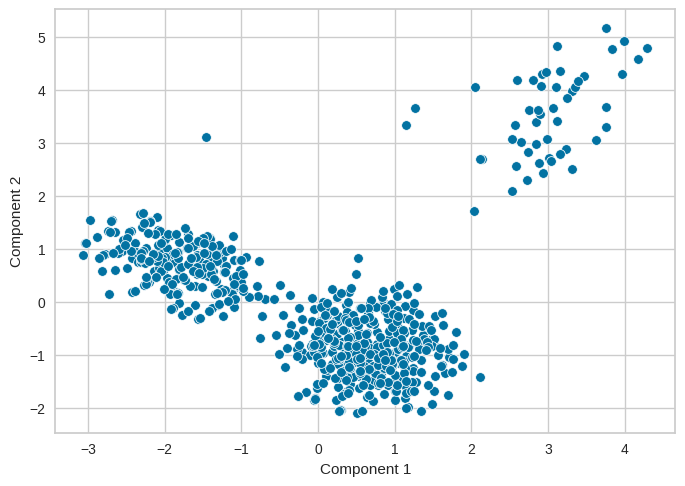

In [ ]:
sns.scatterplot(data=reduced_data_df_pca, x="Component 1", y="Component 2")

<Axes: xlabel='Component 1', ylabel='Component 2'>

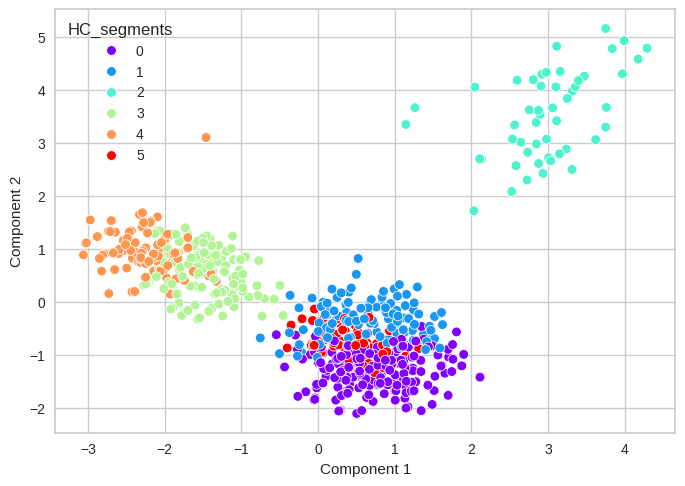

In [ ]:
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=hc_df["HC_segments"],
    palette="rainbow",
)

<font size=6 color='blue'>Power Ahead</font>
___